In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataPath = "TSR_Stkstat.csv"
data_stop = pd.read_csv(dataPath, on_bad_lines='skip')
data_stop = data_stop.drop_duplicates()


In [50]:
# filter out the stocks that had already quit market

delete = [600180, 600565, 600083, 600873, 600503,
          600876, 600849, 600562, 600316, 600603, 601600, 600345, 605169, 605169, 601899, 605319, 
              600767, 600482, 600800, 600691, 600748, 600186, 600159]
          
data_stop = data_stop[-data_stop.Stkcd.isin(((data_stop[data_stop.Type != 1]).Stkcd.unique()).tolist())]
data_stop = data_stop[-data_stop.Stkcd.isin(delete)]



In [51]:
data_stop["Suspdate"] = pd.to_datetime(data_stop["Suspdate"])
data_stop["Resmdate"] = pd.to_datetime(data_stop["Resmdate"])
data_stop.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 93669 entries, 0 to 111217
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Stkcd     93669 non-null  int64         
 1   Stknme    93669 non-null  object        
 2   Annctime  93669 non-null  object        
 3   Type      93669 non-null  int64         
 4   Suspdate  93669 non-null  datetime64[ns]
 5   Susptime  93669 non-null  object        
 6   Resmdate  93661 non-null  datetime64[ns]
 7   Resmtime  93661 non-null  object        
 8   Timeperd  93669 non-null  float64       
 9   Reason    93655 non-null  object        
 10  cons      93669 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 8.6+ MB


In [52]:
data_stop['cons'] = data_stop['Timeperd']/4
data_greater = data_stop[data_stop['cons'] >= 6]
stk = data_greater["Stkcd"].unique()
stk


array([     1,      2,      4, ..., 900945, 900947, 900952])

/var/folders/sy/kj0cr87s71z1_th81869yqd00000gn/T/ipykernel_1160/2467399077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_greater["SuspMonth"] = pd.DatetimeIndex(data_greater['Suspdate']).month


Text(0.5, 1.0, 'Maximum Trading Month')

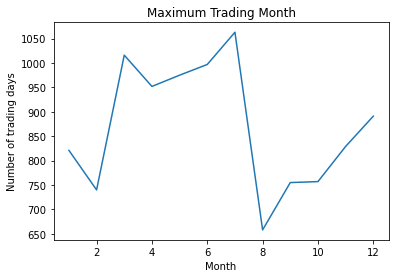

In [5]:
data_greater["SuspMonth"] = pd.DatetimeIndex(data_greater['Suspdate']).month
plt.plot((data_greater["SuspMonth"].value_counts()).sort_index())
plt.ylabel("Number of trading days")
plt.xlabel("Month")
plt.title("Maximum Trading Month")


In [197]:
import datetime
data_greater["weekday"] = np.array((np.datetime64(x)).astype(datetime.datetime).isoweekday()
                                   for x in data_greater["Suspdate"])
pd.DataFrame(data_greater['weekday'].value_counts())


/var/folders/sy/kj0cr87s71z1_th81869yqd00000gn/T/ipykernel_1160/2476213823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_greater["weekday"] = np.array((np.datetime64(x)).astype(datetime.datetime).isoweekday()


,weekday
1,3623
2,1938
4,1676
5,1604
3,1571


In [6]:
import glob
import os 
df = pd.DataFrame()
path_ls = ["ClosePrc/1",
            "ClosePrc/2",
            "ClosePrc/3",
            "ClosePrc/4",
            "ClosePrc/5"]
for path in path_ls:
    all_files = glob.glob(os.path.join(path, "*.csv"))
    tmp = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
    df = df.append(tmp)


data = df.drop_duplicates().sort_values(
    ["Stkcd", "Trddt"]).reset_index(drop=True)
data = data[(data.Markettype == 1) | (data.Markettype == 4)]
data.Trddt = pd.to_datetime(data.Trddt)


In [7]:
data = data.fillna(0)
data = data[data.Stkcd.isin(stk)]
    

In [8]:
import math
data["logret"] = data['Dretwd'].apply(lambda x: math.log(1+x))
data

,Stkcd,Trddt,Hiprc,Loprc,Clsprc,Dnshrtrd,Dretwd,Markettype,ChangeRatio,logret
0,1,2000-01-04,18.55,17.20,18.29,8216086,0.048138,4,0.048138,0.047015
1,1,2000-01-05,18.85,18.00,18.06,9399315,-0.012575,4,-0.012575,-0.012655
2,1,2000-01-06,19.05,17.75,18.78,12022209,0.039867,4,0.039867,0.039093
3,1,2000-01-07,19.77,18.90,19.54,22934633,0.040469,4,0.040469,0.039672
4,1,2000-01-10,20.48,19.77,20.14,18521078,0.030706,4,0.030706,0.030244
...,...,...,...,...,...,...,...,...,...,...
12278121,605286,2022-09-30,41.80,40.19,40.21,2529497,-0.031784,1,-0.031784,-0.032300
12278122,605286,2022-10-10,40.59,38.05,38.31,1793600,-0.047252,1,-0.047252,-0.048405
12278123,605286,2022-10-11,42.14,37.22,42.14,4610619,0.099974,1,0.099974,0.095287
12278124,605286,2022-10-12,44.51,41.22,44.37,5776262,0.052919,1,0.052919,0.051566


In [56]:
data.info()
data_mk1 = data[(data.Markettype == 1)]
mkt1 =  data[(data.Markettype == 1)].Stkcd.unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8397058 entries, 0 to 12278125
Data columns (total 10 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Stkcd        int64         
 1   Trddt        datetime64[ns]
 2   Hiprc        float64       
 3   Loprc        float64       
 4   Clsprc       float64       
 5   Dnshrtrd     int64         
 6   Dretwd       float64       
 7   Markettype   int64         
 8   ChangeRatio  float64       
 9   logret       float64       
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 704.7 MB


In [10]:
data_greater_reason = (data_greater[["Stkcd", "Suspdate", "Susptime",
                "Resmdate", "Resmtime", "cons", "Reason"]]).reset_index(drop=True)
data_greater = (data_greater[["Stkcd", "Suspdate", "Susptime",
                "Resmdate", "Resmtime", "cons"]]).reset_index(drop=True)


Preparation for Trading Date Information

In [11]:
Trd_date = pd.read_csv("TRD_Cale.csv")
Trd_date = Trd_date[Trd_date["State"] == "O"]
Trd_date["Clddt"] = pd.to_datetime(Trd_date["Clddt"])
Trd_date = Trd_date.drop_duplicates()
Trd_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26203 entries, 12 to 39525
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Markettype  26203 non-null  int64         
 1   Clddt       26203 non-null  datetime64[ns]
 2   Daywk       26203 non-null  int64         
 3   State       26203 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1023.6+ KB


1. find out stocks in market 1

In [12]:
Trd_date_1 = Trd_date[Trd_date.Markettype == 1].reset_index(drop=True)
Trd_date_1["Clddt_shift"] = Trd_date_1.Clddt.shift()
Trd_date_1 = Trd_date_1.dropna()
# index suspdate; value trading
date_dict = pd.Series(Trd_date_1.Clddt_shift.values,
                      index=Trd_date_1.Clddt.values).to_dict()

data_greater["Presdate"] = data_greater.apply(
    lambda x: date_dict[x.Suspdate] if(x.Stkcd in data.Stkcd.unique()) else 0, axis=1)

In [57]:
# select the market of Shanghai and Shenzhen
def findPreviousDate(dataframe, mkt):
   
    dict_stock = dict()
    for stock in dataframe.Stkcd.unique():
        stock_df = data_greater[data_greater["Stkcd"] == stock]
        list_stock_signal = list()
        price_df = dataframe[dataframe["Stkcd"] == stock]
        for i in stock_df.Suspdate:
            tmp = date_dict[i]
            while(tmp not in list(price_df.Trddt)):
                tmp = date_dict[tmp]
            
            list_stock_signal.append(tmp)
        dict_stock[stock] = list_stock_signal

    dataframe["Presdate"] = dataframe.apply(lambda x:  True if (
        x.Trddt in dict_stock[x.Stkcd]) else False, axis=1)
    return dataframe

data_mkt1_pre = findPreviousDate(data_mk1, 1)

/var/folders/sy/kj0cr87s71z1_th81869yqd00000gn/T/ipykernel_1160/54420504.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["Presdate"] = dataframe.apply(lambda x:  True if (


In [131]:
#data_mkt1_pre.to_csv('data_mkt1_pre.csv')

#data_mkt1_pre = pd.read_csv('data_mkt1_pre.csv')

data_mkt1_pre

,Stkcd,Trddt,Hiprc,Loprc,Clsprc,Dnshrtrd,Dretwd,Markettype,ChangeRatio,Presdate
6947549,600000,2000-01-04,25.78,24.75,25.57,4496068,0.033131,1,0.033131,False
6947550,600000,2000-01-05,25.98,25.15,25.28,5252814,-0.011341,1,-0.011341,False
6947551,600000,2000-01-06,26.30,25.05,25.99,6229651,0.028085,1,0.028085,False
6947552,600000,2000-01-07,27.50,26.12,26.90,21355330,0.035013,1,0.035013,False
6947553,600000,2000-01-10,27.85,26.71,27.25,16539731,0.013011,1,0.013011,False
...,...,...,...,...,...,...,...,...,...,...
12282478,605319,2022-09-30,13.04,12.62,12.62,516600,-0.023975,1,-0.023975,False
12282479,605319,2022-10-10,12.98,12.59,12.84,594200,0.017433,1,0.017433,False
12282480,605319,2022-10-11,13.55,12.71,13.35,1224528,0.039720,1,0.039720,False
12282481,605319,2022-10-12,13.55,13.17,13.55,883655,0.014981,1,0.014981,False


In [14]:
def calCumret(dataframe, days):
    index_is = dataframe[dataframe["Presdate"]].index
    result = pd.DataFrame()
    for idx in index_is:
        result = result.append(dataframe.loc[idx-days:idx, :])
    result = result.drop_duplicates().reset_index(drop=True)

    index_sus = list(result[result["Presdate"]].index)
    cumret_df = pd.DataFrame(columns=["Stkcd", "ret"])
    cumret_list = list()
    stock_list = list()
    cumret_trd = list()
    avg_vol = list()

    index_sus.insert(0, 0)
    index_sus.insert(len(index_sus)-1, len(result)-1)
    for idx in range(len(index_sus)):
        if(idx < len(index_sus)-2):
            cur = result[index_sus[idx]+1: index_sus[idx+1]+1]
            #if (len(cur) == 3):
            cumret_list.append(sum(cur.logret))
            cumret_trd.append(cur.iloc[len(cur)-1, 1])
            stock_list.append(cur.iloc[0, 0])
            avg_vol.append(np.mean(cur["Dnshrtrd"]))

    cumret_df = pd.DataFrame(
        {"Stkcd": stock_list, "Trddt": cumret_trd, "cumret_log": cumret_list, "avg_vol": avg_vol})
    cumret_df["cumret_arith"] = cumret_df['cumret_log'].apply(
        lambda x: math.exp(x) - 1)

    return cumret_df


In [58]:
cumret_df_mkt1 = calCumret(data_mkt1_pre,2)



Text(0, 0.5, 'Value')

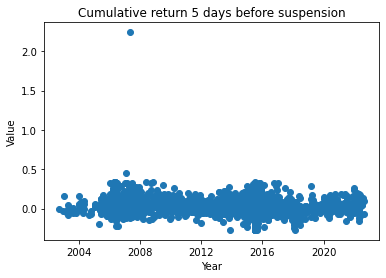

In [16]:
plt.scatter(cumret_df_mkt1.Trddt, cumret_df_mkt1.cumret_arith)
plt.title("Cumulative return 5 days before suspension")
plt.xlabel("Year")
plt.ylabel("Value")

In [223]:
higher_5 = len(cumret_df_mkt1[cumret_df_mkt1.cumret_arith > 0.05])/len(cumret_df_mkt1)
print(" the percentage of cumulative returns above 5% in the 3 days before the trading suspension is " , round(higher_5,4))

lower_5 = len(
    cumret_df_mkt1[cumret_df_mkt1.cumret_arith < -0.05])/len(cumret_df_mkt1)
print(" the percentage of cumulative returns above 5% in the 3 days before the trading suspension is ", round(lower_5, 4))


 the percentage of cumulative returns above 5% in the 3 days before the trading suspension is  0.3082
 the percentage of cumulative returns above 5% in the 3 days before the trading suspension is  0.1067


(0.0, 310.0)

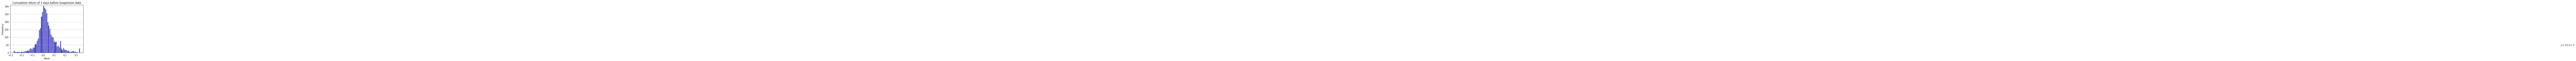

In [205]:
cumret_df_mkt1 = cumret_df_mkt1.drop(cumret_df_mkt1.idxmax())

n, bins, patches = plt.hist(x=cumret_df_mkt1.cumret_arith, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Cumulative return of 3 days before Suspension date')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


(0.0, 370.0)

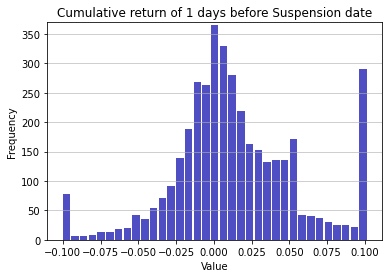

In [219]:
# plt.figure(figsize=(8, 6), dpi=80)
n, bins, patches = plt.hist(x=(data_mkt1_pre[data_mkt1_pre.Presdate]).Dretwd, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Cumulative return of 1 days before Suspension date')
# plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
# plt.savefig('test')

In [220]:
(data_mkt1_pre[data_mkt1_pre.Presdate]).Dretwd.max()


0.101754

In [208]:
data_greater[data_greater.Stkcd == 600000]

,Stkcd,Suspdate,Susptime,Resmdate,Resmtime,cons,Presdate
6434,600000,2006-02-27,9:30,2006-03-09,9:30,8.0,2006-02-24 00:00:00
6435,600000,2006-03-21,9:30,2006-05-12,9:30,33.0,2006-03-20 00:00:00
6436,600000,2010-02-26,9:30,2010-03-11,9:30,9.0,2010-02-25 00:00:00
6437,600000,2015-06-08,9:30,2015-06-17,9:30,7.0,2015-06-05 00:00:00
6438,600000,2015-10-15,9:30,2015-10-26,9:30,7.0,2015-10-14 00:00:00
6439,600000,2016-02-16,9:30,2016-03-11,9:30,18.0,2016-02-15 00:00:00


In [183]:
## find out the outlier
cumret_df_mkt1.iloc[(cumret_df_mkt1.cumret_arith).idxmax(),:]
pd.set_option('display.max_rows', 10)
(data_mk1[data_mk1.Stkcd == 600757]).iloc[1662:, :]


,Stkcd,Trddt,Hiprc,Loprc,Clsprc,Dnshrtrd,Dretwd,Markettype,ChangeRatio,logret,Presdate
10179096,600757,2007-01-12,3.46,3.28,3.29,13173392,-0.003030,1,-0.003030,-0.003035,True
10179097,600757,2007-04-25,10.87,5.62,8.38,114574644,2.998966,1,1.982206,1.386036,False
10179098,600757,2007-04-26,7.98,7.54,7.54,38641747,-0.100239,1,-0.100239,-0.105626,False
10179099,600757,2007-04-27,7.11,6.79,6.79,27712598,-0.099469,1,-0.099469,-0.104771,True
10179100,600757,2007-05-30,7.13,6.79,7.13,28967452,0.050074,1,0.050074,0.048861,False
...,...,...,...,...,...,...,...,...,...,...,...
10182525,600757,2022-09-30,5.46,5.37,5.39,6640721,-0.003697,1,-0.003697,-0.003704,False
10182526,600757,2022-10-10,5.46,5.36,5.39,7214141,0.000000,1,0.000000,0.000000,False
10182527,600757,2022-10-11,5.46,5.31,5.42,8112228,0.005566,1,0.005566,0.005551,False
10182528,600757,2022-10-12,5.49,5.37,5.48,7089655,0.011070,1,0.011070,0.011009,False


2. Calculate stocks in market 2

In [309]:
data_greater.drop_duplicates()

,Stkcd,Suspdate,Susptime,Resmdate,Resmtime,cons,Presdate
0,1,2005-09-28,9:30,2005-10-21,9:30,12.0,2005-09-27
1,1,2006-05-29,9:30,2006-06-12,9:30,10.0,2006-05-26
2,1,2006-07-10,9:30,2006-07-19,9:30,7.0,2006-07-07
3,1,2007-05-14,9:30,2007-05-25,9:30,9.0,2007-05-11
4,1,2007-06-01,9:30,2007-06-20,9:30,13.0,2007-05-31
...,...,...,...,...,...,...,...
12182,900955,2011-02-17,9:30,2011-03-17,9:30,20.0,2011-02-16
12183,900955,2014-04-22,9:30,2014-04-30,9:30,6.0,2014-04-21
12184,900955,2015-06-03,9:30,2015-11-18,9:30,112.0,2015-06-02
12185,900955,2022-05-05,9:30,2022-06-16,9:30,29.0,2022-04-29


In [109]:
data_mk2 = data[(data.Markettype == 4)]
data_mkt2_pre = findPreviousDate(data_mk2, 4)



/var/folders/sy/kj0cr87s71z1_th81869yqd00000gn/T/ipykernel_1160/54420504.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["Presdate"] = dataframe.apply(lambda x:  True if (


Text(0, 0.5, 'Value')

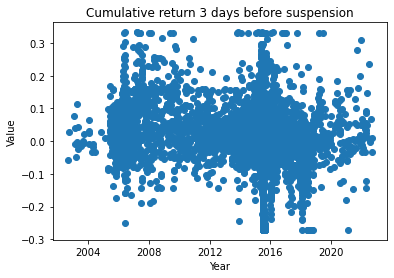

In [110]:
cumret_df_mkt2 = calCumret(data_mkt2_pre,2)

plt.scatter(cumret_df_mkt2.Trddt, cumret_df_mkt2.cumret_arith)
plt.title("Cumulative return 3 days before suspension")
plt.xlabel("Year")
plt.ylabel("Value")


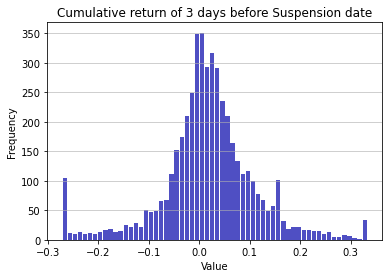

In [236]:
n, bins, patches = plt.hist(x=cumret_df_mkt2.cumret_arith, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Cumulative return of 3 days before Suspension date')
maxfreq = n.max()


(0.0, 380.0)

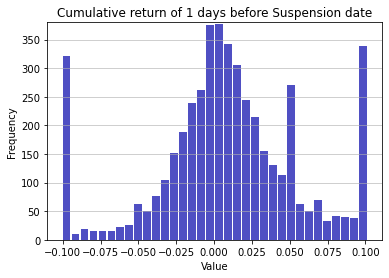

In [237]:
# plt.figure(figsize=(8, 6), dpi=80)
n, bins, patches = plt.hist(x=(data_mkt2_pre[data_mkt2_pre.Presdate]).Dretwd, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Cumulative return of 1 days before Suspension date')
# plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
# plt.savefig('test')


Text(0, 0.5, 'Value')

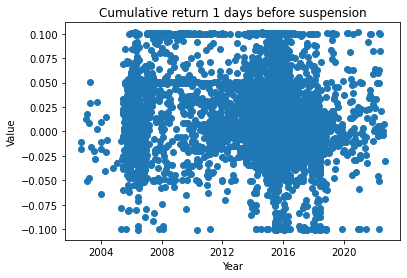

In [239]:
plt.scatter((data_mkt2_pre[data_mkt2_pre.Presdate]).Trddt,
            (data_mkt2_pre[data_mkt2_pre.Presdate]).Dretwd)
plt.title("Cumulative return 1 days before suspension")
plt.xlabel("Year")
plt.ylabel("Value")


In [240]:
higher_5 = len(
    cumret_df_mkt2[cumret_df_mkt2.cumret_arith > 0.05])/len(cumret_df_mkt2)
print(" the percentage of cumulative returns above 5% in the 3 days before the trading suspension is ", round(higher_5, 4))

lower_5 = len(
    cumret_df_mkt2[cumret_df_mkt2.cumret_arith < -0.05])/len(cumret_df_mkt2)
print(" the percentage of cumulative returns lower -5% in the 3 days before the trading suspension is ", round(lower_5, 4))


 the percentage of cumulative returns above 5% in the 3 days before the trading suspension is  0.3017
 the percentage of cumulative returns lower -5% in the 3 days before the trading suspension is  0.1533


In [276]:
grouped = (data_mkt2_pre[data_mkt2_pre.Presdate]).groupby('Stkcd', as_index = False)
grouped_index_mk1 = grouped.apply(lambda x: x.reset_index(drop=True)).reset_index()
grouped_index_mk1 = grouped_index_mk1.drop("level_0", axis = 1)
grouped_index_mk1


,level_1,Stkcd,Trddt,Hiprc,Loprc,Clsprc,Dnshrtrd,Dretwd,Markettype,ChangeRatio,logret,Presdate
0,0,1,2005-09-27,5.99,5.75,5.76,5031324,-0.030303,4,-0.030303,-0.030772,True
1,1,1,2006-05-26,8.99,8.23,8.78,70907528,0.070732,4,0.070732,0.068343,True
2,2,1,2006-07-07,7.95,7.58,7.71,26144709,-0.030189,4,-0.030189,-0.030654,True
3,3,1,2007-05-11,28.10,26.04,27.85,25931276,0.039179,4,0.039179,0.038431,True
4,4,1,2007-05-31,28.69,26.30,28.69,90502870,0.050146,4,0.050146,0.048929,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4775,0,2902,2020-01-10,24.93,24.31,24.58,6875403,-0.002840,4,-0.002840,-0.002844,True
4776,0,2940,2022-03-25,39.88,36.43,38.59,4022664,0.059583,4,0.059583,0.057875,True
4777,0,2943,2021-12-10,55.65,52.01,54.73,14098104,0.081834,4,0.081834,0.078658,True
4778,0,2948,2022-01-04,4.72,4.62,4.70,22764141,0.015119,4,0.015119,0.015006,True


In [277]:
grouped = data_greater_reason.groupby('Stkcd', as_index=False)
grouped_index = grouped.apply(lambda x: x.reset_index(drop=True)).reset_index()
grouped_index = grouped_index.drop("level_0", axis=1)
grouped_index[grouped_index.Stkcd == 605090]


,level_1,Stkcd,Suspdate,Susptime,Resmdate,Resmtime,cons,Reason
10355,0,605090,2022-01-04,9:30,2022-01-18,9:30,10.0,拟筹划重大资产重组


In [282]:
data_r_mkt1 = grouped_index_mk1.merge(grouped_index)
pd.set_option('display.max_rows', 10)
data_r_mkt1[data_r_mkt1.Dretwd >= 0]


,level_1,Stkcd,Trddt,Hiprc,Loprc,Clsprc,Dnshrtrd,Dretwd,Markettype,ChangeRatio,logret,Presdate,Suspdate,Susptime,Resmdate,Resmtime,cons,Reason
1,1,1,2006-05-26,8.99,8.23,8.78,70907528,0.070732,4,0.070732,0.068343,True,2006-05-29,9:30,2006-06-12,9:30,10.0,股权分置改革相关股东会议通知;
3,3,1,2007-05-11,28.10,26.04,27.85,25931276,0.039179,4,0.039179,0.038431,True,2007-05-14,9:30,2007-05-25,9:30,9.0,因公司有重大事项即将披露
4,4,1,2007-05-31,28.69,26.30,28.69,90502870,0.050146,4,0.050146,0.048929,True,2007-06-01,9:30,2007-06-20,9:30,13.0,相关股东会议特别提示公告（股权登记日次日起停牌）;
6,6,1,2012-01-09,15.81,15.25,15.78,22113866,0.028013,4,0.028013,0.027628,True,2012-01-10,9:30,2012-01-20,9:30,8.0,"临时停牌,重大事项"
8,1,2,2005-11-04,3.96,3.81,3.95,79266072,0.015424,4,0.015424,0.015306,True,2005-11-07,9:30,2005-12-02,9:30,19.0,相关股东会议特别提示公告;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4774,0,2891,2019-07-16,18.57,18.03,18.46,1505050,0.028986,4,0.028986,0.028574,True,2019-07-17,9:30,2019-07-31,9:30,10.0,重大事项
4776,0,2940,2022-03-25,39.88,36.43,38.59,4022664,0.059583,4,0.059583,0.057875,True,2022-03-28,9:30,2022-04-13,9:30,10.0,重大事项
4777,0,2943,2021-12-10,55.65,52.01,54.73,14098104,0.081834,4,0.081834,0.078658,True,2021-12-13,9:30,2021-12-27,9:30,10.0,"股价异动,重大事项"
4778,0,2948,2022-01-04,4.72,4.62,4.70,22764141,0.015119,4,0.015119,0.015006,True,2022-01-05,9:30,2022-01-13,9:30,6.0,重大事项


Calculate CAPM for each filtered stocks

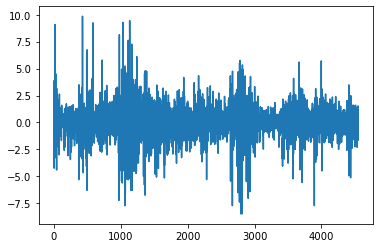

In [28]:
index = pd.DataFrame()
path_ls = ["index/1",
            "index/2",
            "index/3",
            "index/4",
            "index/5"]
for path in path_ls:
    all_files = glob.glob(os.path.join(path, "*.csv"))
    tmp = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
    index = index.append(tmp)

index = index.rename(columns = {"Idxtrd01" : "Trddt", "Idxtrd05" : "value", "Idxtrd08": "ret" } )
index.Trddt = pd.to_datetime(index.Trddt)
index = index.sort_values("Trddt").drop_duplicates().reset_index(drop = True)

index
plt.plot(index.ret)

In [358]:
import statsmodels.formula.api as smf
unique_stock = data_mkt1_pre.Stkcd.unique()
mean_list = []
var_list = []
for i in range(len(unique_stock)):
    cur = data_mkt1_pre[data_mkt1_pre.Stkcd == unique_stock[i]]
    stock_return = cur.merge(index)
    stock_return.diff = stock_return.Dretwd - stock_return.ret
    mean = stock_return.diff.mean()
    var = stock_return.diff.var()
    mean_list.append(mean)
    var_list.append(var)
result = pd.DataFrame(
    {"Stkcd": unique_stock, "mean": mean_list, "var": var_list})

result


,Stkcd,mean,var
0,600000,0.001482,2.156571
1,600004,0.004542,2.197445
2,600006,0.000872,2.158076
3,600007,-0.001704,2.165002
4,600008,0.004465,2.129309
...,...,...,...
986,603998,-0.024695,1.777124
987,605090,0.032910,1.024156
988,605169,0.009495,1.001015
989,605286,0.034125,0.974841


(0.0, 310.0)

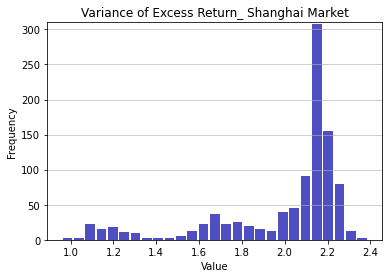

In [361]:

n, bins, patches = plt.hist(x = result['var'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title("Variance of Excess Return_ Shanghai Market")
# plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
# plt.savefig('test')


In [40]:
result = pd.DataFrame({"Stock":unique_stock, "Alpha":alpha_list, "Beta":beta_list})

In [42]:
len(data_mk1.Stkcd.unique())

991

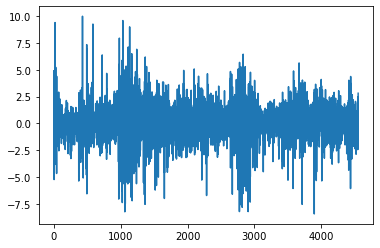

In [290]:
index2 = pd.DataFrame()
path_ls = ["index_shenzhen/1",
           "index_shenzhen/2",
           "index_shenzhen/3",
           "index_shenzhen/4",
           "index_shenzhen/5"]
for path in path_ls:
    all_files = glob.glob(os.path.join(path, "*.csv"))
    tmp = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
    index2 = index2.append(tmp)


index2 = index2.rename(
    columns={"Idxtrd01": "Trddt", "Idxtrd05": "value", "Idxtrd08": "ret"})
index2.Trddt = pd.to_datetime(index2.Trddt)
index2 = index2.sort_values("Trddt").drop_duplicates().reset_index(drop=True)

index2
plt.plot(index2.ret)


In [349]:
import statsmodels.formula.api as smf
unique_stock = data_mkt2_pre.Stkcd.unique()
mean_list = []
var_list = []
for i in range(len(unique_stock)):
    cur = data_mkt2_pre[data_mkt2_pre.Stkcd == unique_stock[i]]
    stock_return = cur.merge(index2)
    stock_return.diff = stock_return.Dretwd - stock_return.ret
    mean = stock_return.diff.mean()
    var = stock_return.diff.var()
    mean_list.append(mean)
    var_list.append(var)
result = pd.DataFrame(
    {"Stkcd": unique_stock, "mean": mean_list, "var": var_list})

result


,Indexcd,Trddt,ret
0,399002,2000-01-04,3.8455
1,399002,2000-01-05,-0.2030
2,399002,2000-01-06,4.9190
3,399002,2000-01-07,4.6815
4,399002,2000-01-10,2.4898
...,...,...,...
4546,399002,2022-10-10,-2.3797
4547,399002,2022-10-11,0.5293
4548,399002,2022-10-12,2.4643
4549,399002,2022-10-13,-0.1873


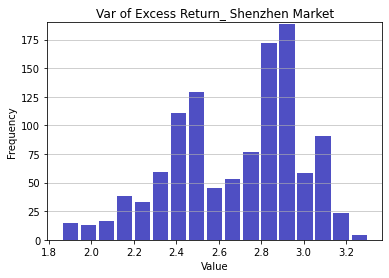

In [357]:

n, bins, patches = plt.hist(x=result["var"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title("Var of Excess Return_ Shenzhen Market")
# plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
# plt.savefig('test')
index2


iii. How was the first trading day after the suspension? 

In [17]:
Trd_date_1 = Trd_date[Trd_date.Markettype == 1].reset_index(drop = True)
Trd_date_1["Clddt_shift"] = Trd_date_1["Clddt"].shift(-1)
Trd_date_1 = Trd_date_1.dropna()
Trd_date_1

,Markettype,Clddt,Daywk,State,Clddt_shift
0,1,2000-01-04,2,O,2000-01-05
1,1,2000-01-05,3,O,2000-01-06
2,1,2000-01-06,4,O,2000-01-07
3,1,2000-01-07,5,O,2000-01-10
4,1,2000-01-10,1,O,2000-01-11
...,...,...,...,...,...
5511,1,2022-09-28,3,O,2022-09-29
5512,1,2022-09-29,4,O,2022-09-30
5513,1,2022-09-30,5,O,2022-10-10
5514,1,2022-10-10,1,O,2022-10-11


In [59]:
res_df = pd.DataFrame()
for i in data_mkt1_pre.Stkcd.unique():
    cur = data_greater[data_greater.Stkcd == i]
    cur_date = cur.Resmdate.tolist()
    tmp = data_mkt1_pre[(data_mkt1_pre.Stkcd == i) & data_mkt1_pre.Trddt.isin(cur_date)]
    
    res_df = res_df.append(tmp)
res_df.Presdate = "Aftdate"
res_df = res_df.sort_values(["Stkcd", "Trddt"]).reset_index(drop = True)


(0.0, 1090.0)

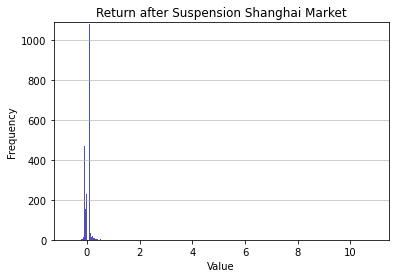

In [94]:
n, bins, patches = plt.hist(x=res_df.Dretwd, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title("Return after Suspension Shanghai Market")
# plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
# plt.savefig('test')




Stkcd                       600743
Trddt          2008-08-28 00:00:00
Hiprc                        11.21
Loprc                         6.88
Clsprc                        7.01
Dnshrtrd                   9874092
Dretwd                   -0.687333
Markettype                       1
ChangeRatio              -0.687333
logret                   -1.162617
Presdate                   Aftdate
Name: 2679, dtype: object

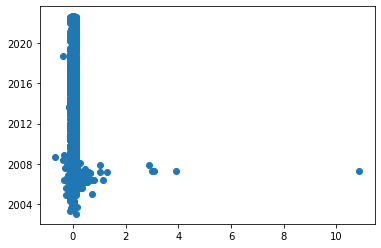

In [96]:

plt.scatter(res_df.Dretwd, res_df.Trddt)
res_df.iloc[res_df.Dretwd.idxmax(), :]
res_df.iloc[res_df.Dretwd.idxmin(), :]


In [380]:
data_mk1[data_mk1.Stkcd == 600137].iloc[1643:,:]

,Stkcd,Trddt,Hiprc,Loprc,Clsprc,Dnshrtrd,Dretwd,Markettype,ChangeRatio,logret,Presdate
7542534,600137,2006-12-19,7.04,6.69,6.91,404635,-0.015670,1,-0.015670,-0.015794,False
7542535,600137,2006-12-20,7.26,7.00,7.18,534730,0.039074,1,0.039074,0.038330,True
7542536,600137,2007-04-13,85.00,14.36,68.16,13172204,10.866295,1,8.493036,2.473702,False
7542537,600137,2007-04-20,64.75,64.75,64.75,80200,-0.050029,1,-0.050029,-0.051324,False
7542538,600137,2007-04-23,61.51,61.51,61.51,3800,-0.050039,1,-0.050039,-0.051334,False
...,...,...,...,...,...,...,...,...,...,...,...
7546213,600137,2022-09-30,13.88,13.50,13.61,1121411,-0.017329,1,-0.017329,-0.017481,False
7546214,600137,2022-10-10,13.85,13.44,13.58,997532,-0.002204,1,-0.002204,-0.002206,False
7546215,600137,2022-10-11,14.18,13.06,14.18,2025600,0.044183,1,0.044183,0.043235,False
7546216,600137,2022-10-12,14.92,13.60,14.62,6731002,0.031030,1,0.031030,0.030558,False


In [107]:
data_mk1[data_mk1.Stkcd == 600743].iloc[1655:,:]


,Stkcd,Trddt,Hiprc,Loprc,Clsprc,Dnshrtrd,Dretwd,Markettype,ChangeRatio,logret,Presdate
10111000,600743,2008-02-04,20.92,19.63,20.76,1690970,0.040602,1,0.040602,0.039799,False
10111001,600743,2008-02-05,21.80,20.53,21.79,2109295,0.049615,1,0.049615,0.048423,False
10111002,600743,2008-02-13,22.83,21.80,22.42,3052498,0.028912,1,0.028912,0.028502,True
10111003,600743,2008-08-28,11.21,6.88,7.01,9874092,-0.687333,1,-0.687333,-1.162617,False
10111004,600743,2008-08-29,7.20,6.66,6.93,6294267,-0.011412,1,-0.011412,-0.011478,False
...,...,...,...,...,...,...,...,...,...,...,...
10114397,600743,2022-09-30,1.86,1.81,1.83,15077955,0.005495,1,0.005495,0.005480,False
10114398,600743,2022-10-10,1.88,1.81,1.81,18144360,-0.010929,1,-0.010929,-0.010989,False
10114399,600743,2022-10-11,1.83,1.78,1.82,13782290,0.005525,1,0.005525,0.005510,False
10114400,600743,2022-10-12,1.84,1.79,1.84,10138770,0.010989,1,0.010989,0.010929,False


In [60]:
data_after = data_mkt1_pre[data_mkt1_pre.Presdate].append(res_df)
data_after = data_after.sort_values(["Stkcd", "Trddt"]).reset_index(drop = True)
data_after["Clsprc"] = data_after["Clsprc"].shift()
data_after = data_after[data_after.Presdate == "Aftdate"]
data_after["HI"] = data_after.Hiprc / data_after.Clsprc - 1
data_after["LI"] = data_after.Loprc / data_after.Clsprc - 1
data_after

,Stkcd,Trddt,Hiprc,Loprc,Clsprc,Dnshrtrd,Dretwd,Markettype,ChangeRatio,logret,Presdate,HI,LI
1,600000,2006-03-09,11.49,10.97,12.19,39108134,-0.096801,1,-0.096801,-0.101812,Aftdate,-0.057424,-0.100082
3,600000,2006-05-12,10.66,9.80,10.86,141086876,0.222191,1,-0.059853,0.200645,Aftdate,-0.018416,-0.097606
5,600000,2010-03-11,21.80,20.90,20.74,230271759,0.027001,1,0.027001,0.026643,Aftdate,0.051109,0.007715
7,600000,2015-06-17,18.98,17.95,18.43,513118652,-0.012480,1,-0.012480,-0.012559,Aftdate,0.029843,-0.026044
9,600000,2015-10-26,16.57,16.03,15.90,101041055,0.023899,1,0.023899,0.023618,Aftdate,0.042138,0.008176
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7727,603997,2018-10-12,9.78,9.78,10.87,416100,-0.100276,1,-0.100276,-0.105667,Aftdate,-0.100276,-0.100276
7729,603998,2015-07-01,58.60,58.60,65.11,84600,-0.099985,1,-0.099985,-0.105344,Aftdate,-0.099985,-0.099985
7731,603998,2018-05-02,9.71,8.49,9.43,9406140,-0.010604,1,-0.010604,-0.010661,Aftdate,0.029692,-0.099682
7733,605090,2022-01-18,37.25,32.91,35.17,13064382,-0.051464,1,-0.051464,-0.052836,Aftdate,0.059141,-0.064259


In [21]:
data_after.loc[data_after.HI.idxmax(),:]
data_after.loc[data_after.HI.idxmin(), :]

Stkcd                       600018
Trddt          2006-10-26 00:00:00
Hiprc                         3.94
Loprc                         3.62
Clsprc                       16.37
Dnshrtrd                 323617530
Dretwd                    0.032698
Markettype                       1
ChangeRatio               0.032698
logret                    0.032175
Presdate                   Aftdate
HI                       -0.759316
LI                       -0.778864
Name: 77, dtype: object

In [87]:
d1 = res_df[["Stkcd",'Trddt', "Dnshrtrd"]]
d2 = cumret_df_mkt1[["Stkcd", 'Trddt', "avg_vol"]]
d2 = d2.rename(columns = {"avg_vol": "Dnshrtrd"})
result = (d1.append(d2)).sort_values(["Stkcd", "Trddt"]).reset_index(drop = True)

result["Diff"] = result["Dnshrtrd"] - result["Dnshrtrd"].shift(1)
result = result.loc[result.index % 2 == 1]

len(result[result.Diff > 0] ) / len(result)

0.6145294725956567

Text(0.5, 0, 'year')

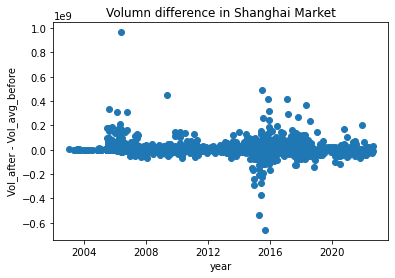

In [93]:
plt.scatter(result.Trddt, result.Diff)
plt.title("Volumn difference in Shanghai Market")
plt.ylabel("Vol_after - Vol_avg_before")
plt.xlabel("year")


### c. Reports trading days with an event type of "starting a suspension" that occurred after 2000. Draw and count the total number of events of this type corresponding to each trading day. Which trading day has the largest number of "start suspension" events? explain the reason.


In [92]:
print("There are",len(data_stop["Suspdate"].unique()), "trading days with the event type of starting a suspension")

There are 4689 trading days with the event type of starting a suspension


In [49]:
data_greater

,Stkcd,Suspdate,Susptime,Resmdate,Resmtime,cons
0,1,2005-09-28,9:30,2005-10-21,9:30,12.00
1,1,2006-05-29,9:30,2006-06-12,9:30,10.00
2,1,2006-07-10,9:30,2006-07-19,9:30,7.00
3,1,2007-05-14,9:30,2007-05-25,9:30,9.00
4,1,2007-06-01,9:30,2007-06-20,9:30,13.00
...,...,...,...,...,...,...
10458,900943,2006-12-18,9:30,2007-01-04,9:30,10.00
10459,900945,2015-03-31,9:30,2015-04-14,9:30,9.00
10460,900945,2018-01-11,9:30,2018-07-20,9:30,126.00
10461,900947,2008-03-28,9:30,2008-04-09,10:30,7.25


Text(0.5, 0, 'date')

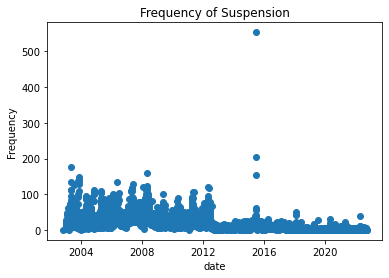

In [189]:
date = pd.DataFrame(data_stop["Suspdate"].value_counts())
date = date.sort_index()
import matplotlib.pyplot as plt


plt.scatter(date.index, date.Suspdate)
plt.title("Frequency of Suspension")
plt.ylabel("Frequency")
plt.xlabel("date")


In [183]:
date.sort_values("Suspdate",ascending= False).index[0]


Timestamp('2015-07-08 00:00:00')

Reason:

In [186]:
date

,Suspdate
2002-10-08,1
2003-01-02,29
2003-01-03,18
2003-01-06,3
2003-01-07,23
...,...
2022-09-27,2
2022-09-29,5
2022-09-30,5
2022-10-10,1
